In [1]:
#from ensemble import RegressionEnsemble, MixedRegressionEnsemble, BootstrapEnsemble, ShuffleEnsemble
import ensemble
import importlib
importlib.reload(ensemble)

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 4]


from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Toy dataset
from http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [2]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
forest_regression = ensemble.RegressionEnsemble()
forest_regression.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_forest,std_forest = forest_regression.predict(X_test,std=True)

# Plot the results
#plt.figure()
#plt.scatter(X, y, s=20, edgecolor="black",
#            c="darkorange", label="data")
#plt.plot(X_test, y_forest, color="cornflowerblue",
#        label="max_depth=2", linewidth=2)
#plt.plot(X_test,std_forest,color="black")

#plt.xlabel("data")
#plt.ylabel("target")
#plt.title("Decision Tree Regression")
#plt.legend()
#plt.show()

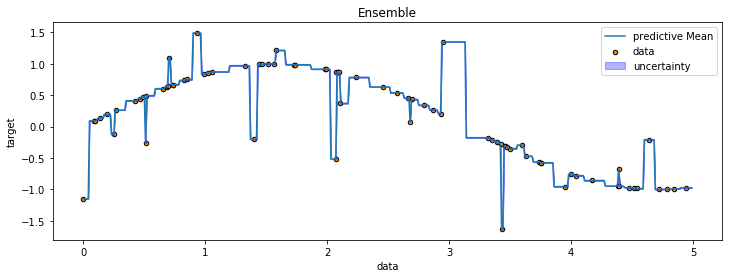

In [3]:
forest_regression.scatterplot(X_test,X=X,y=y)

# Mixed Models

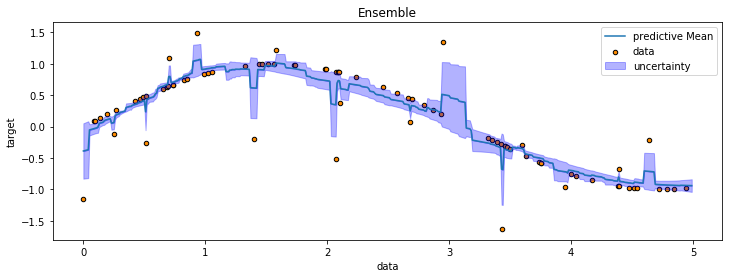

In [4]:
mixed_ensemble = ensemble.MixedRegressionEnsemble(models = [DecisionTreeRegressor(),
                                                            #LinearRegression(),
                                                            KNeighborsRegressor(),
                                                            MLPRegressor(max_iter=1000),
                                                           SVR()])
mixed_regression = mixed_ensemble#DecisionTreeRegressor(max_depth=5)
mixed_regression.fit(X, y)
y_mixed,std_mixed = mixed_regression.predict(X_test,std=True)

mixed_ensemble.scatterplot(X_test,X=X,y=y)

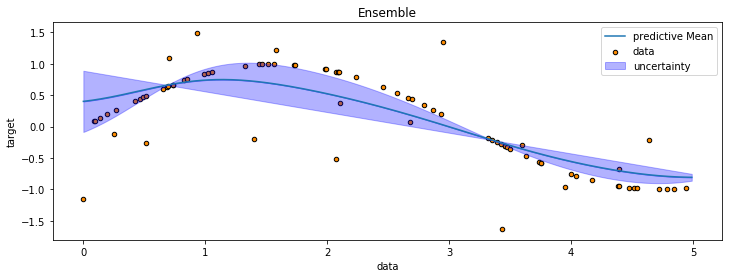

In [5]:
mixed_ensemble_2 = ensemble.MixedRegressionEnsemble(models = [#DecisionTreeRegressor(),
                                                            LinearRegression(),
                                                            #KNeighborsRegressor(),
                                                            #MLPRegressor(max_iter=1000),
                                                           SVR()
                                                             ])
mixed_regression = mixed_ensemble_2#DecisionTreeRegressor(max_depth=5)
mixed_regression.fit(X, y)
y_mixed,std_mixed = mixed_ensemble_2.predict(X_test,std=True)

mixed_ensemble_2.scatterplot(X_test,X=X,y=y)

# Bootstrap

In [6]:
bootstrap_ensemble = ensemble.BootstrapEnsemble()

In [7]:
bootstrap_regression = bootstrap_ensemble#DecisionTreeRegressor(max_depth=5)
bootstrap_regression.fit(X, y)

# Predict
y_bootstrap,std_bootstrap = bootstrap_regression.predict(X_test,std=True)



80 80


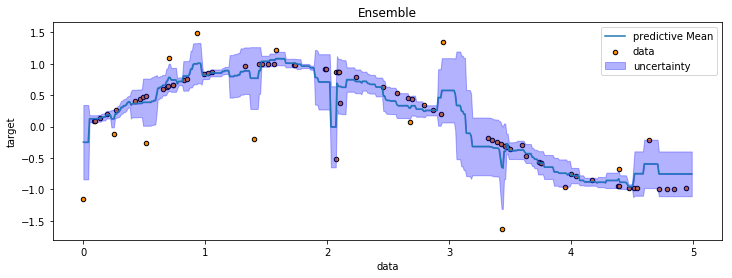

In [8]:
bootstrap_ensemble.scatterplot(X_test,X=X,y=y)

# Different Data shuffling

In [9]:
shuffle_ensemble = ensemble.ShuffleEnsemble()

In [10]:
shuffle_regression = shuffle_ensemble#DecisionTreeRegressor(max_depth=5)
shuffle_regression.fit(X, y)

# Predict
y_shuffle,std_shuffle = shuffle_regression.predict(X_test,std=True)



80 80


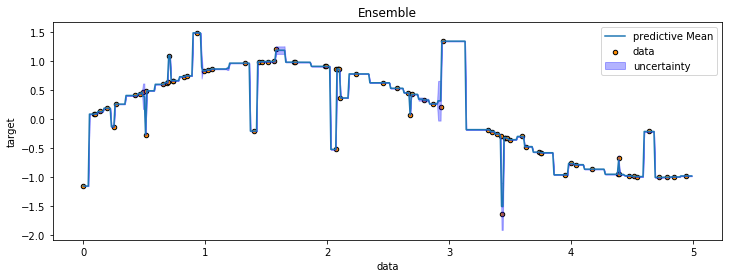

In [11]:
shuffle_ensemble.scatterplot(X_test,X=X,y=y)

# Boston Housing Prices ([:,5 is rooms per venue])

In [12]:
boston = load_boston()
y = boston.target
X = boston.data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## TreeEnsemble

In [13]:
treeEnsemble = ensemble.RegressionEnsemble(10,DecisionTreeRegressor)

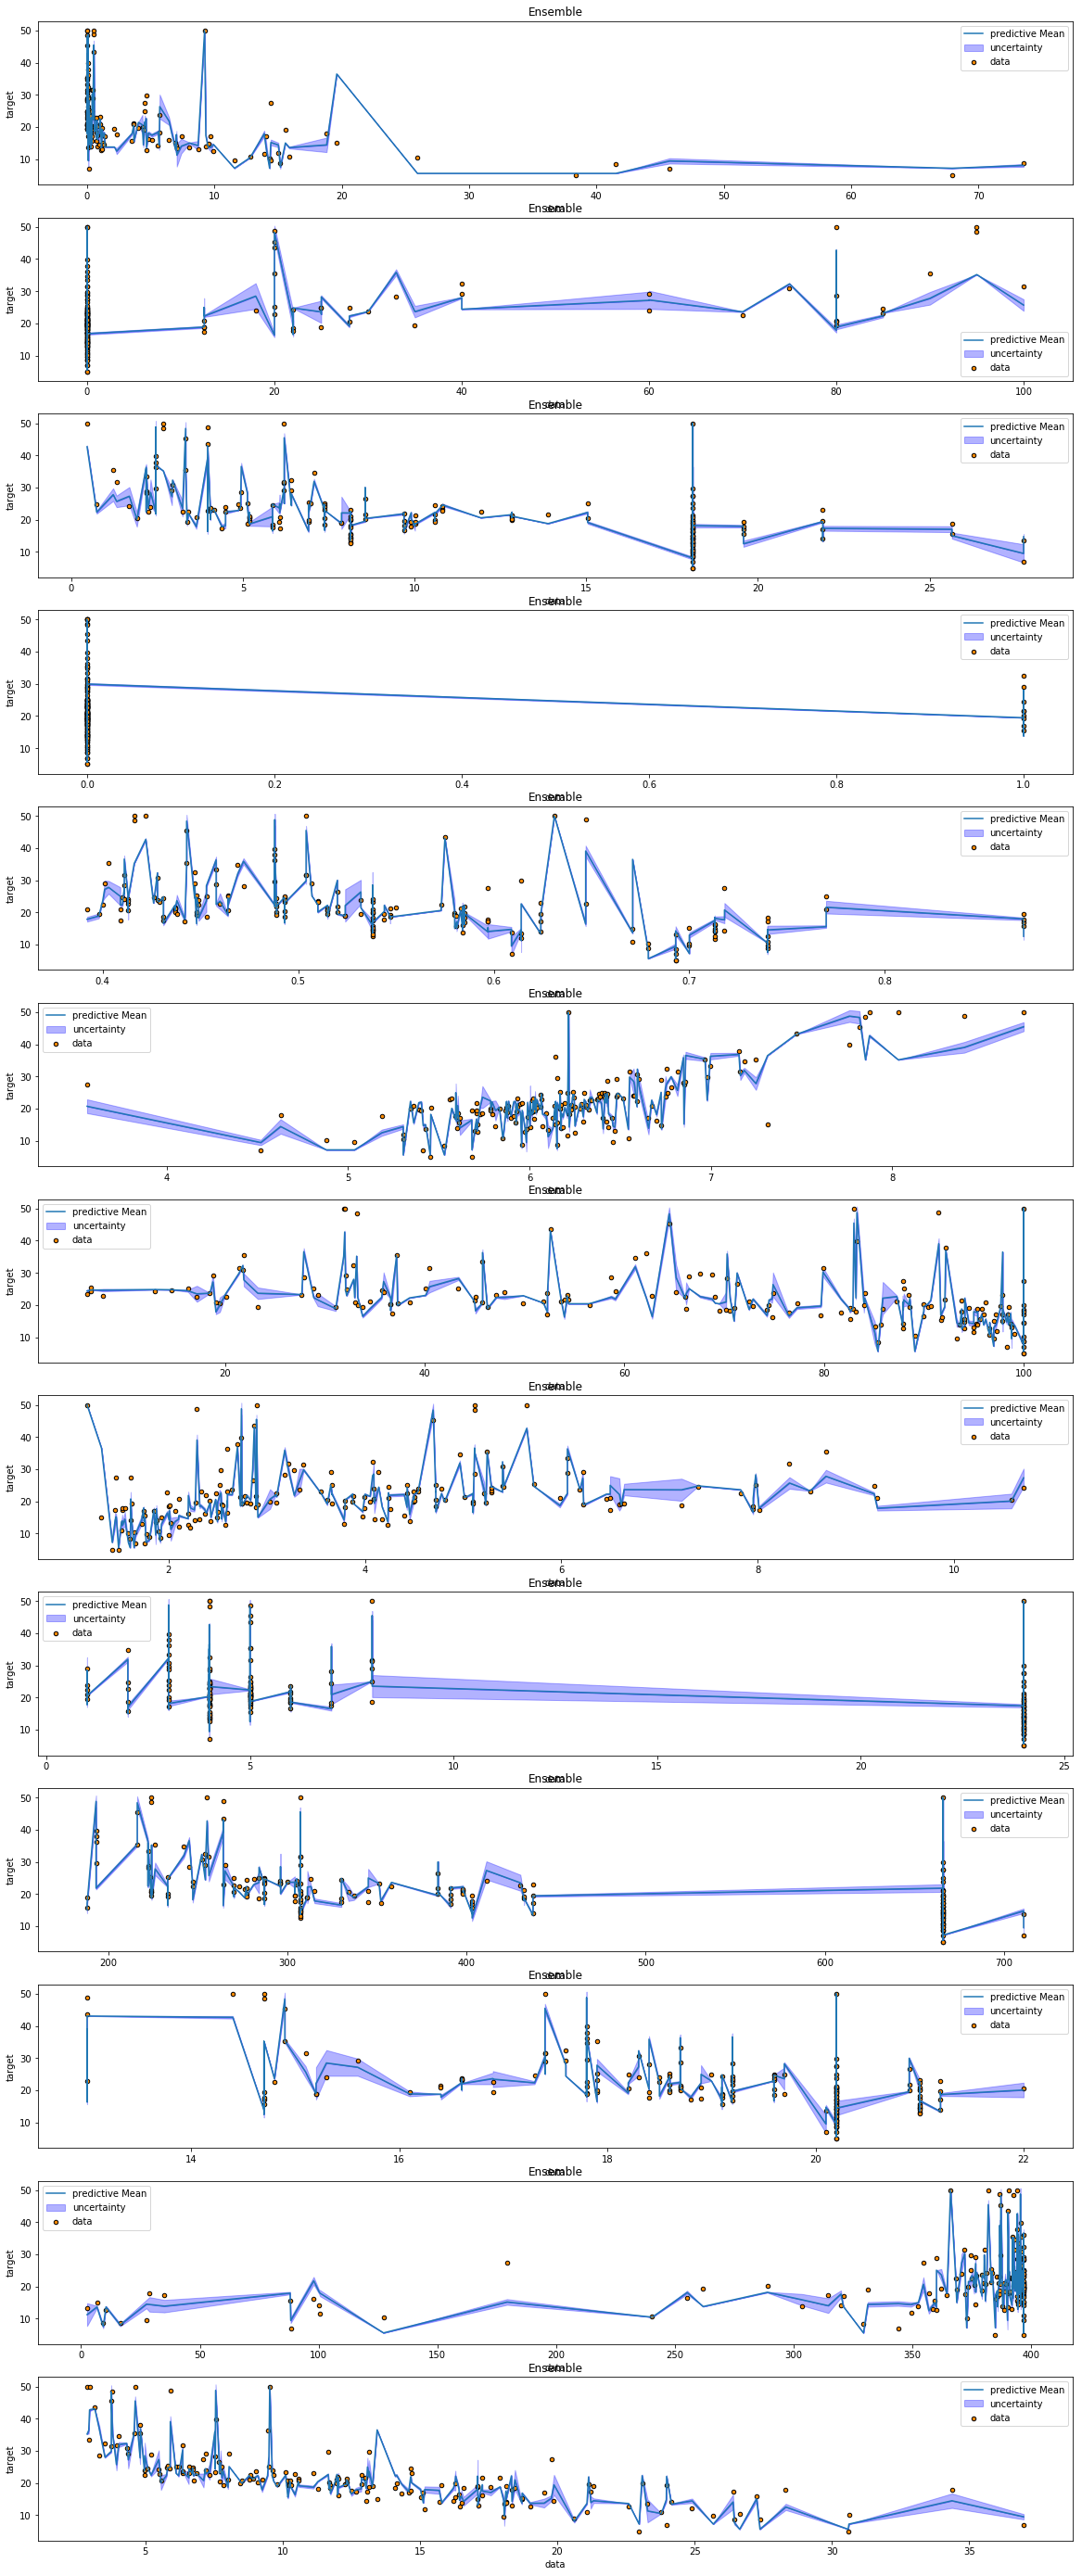

In [14]:
treeEnsemble.fit(X_train,y_train)
y_hat,std  = treeEnsemble.predict(X_test,std=True)
treeEnsemble.mutli_dimenstional_scatterplot(X_test,y_test)

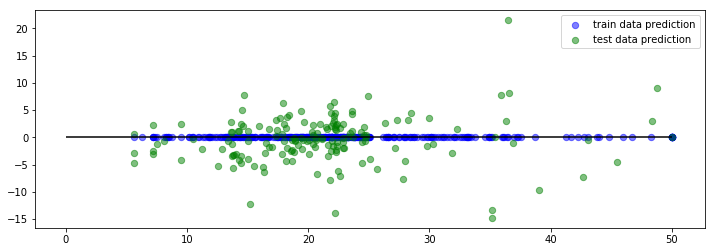

In [15]:
treeEnsemble.plot_residuals(X_train,y_train,X_test,y_test)

In [16]:
treeEnsemble.self_evaluate(X_test,y_test)

(167,) (167,) (167,)
coverage Probability is: 0.11976047904191617
correlation of error and uncertainty is: (-0.0037210455722983269, 0.96193501467817177)
correlation of target value and uncertainty is: (0.87219104981151352, 4.086084758277716e-53)
correlation of target value and error is: (0.87219104981151352, 4.086084758277716e-53)


## Mixed Ensemble

In [17]:
mixed_ensemble = ensemble.MixedRegressionEnsemble(models = [DecisionTreeRegressor(),
                                                            #LinearRegression(),
                                                            KNeighborsRegressor(),
                                                            MLPRegressor(max_iter=1000),
                                                           SVR()])

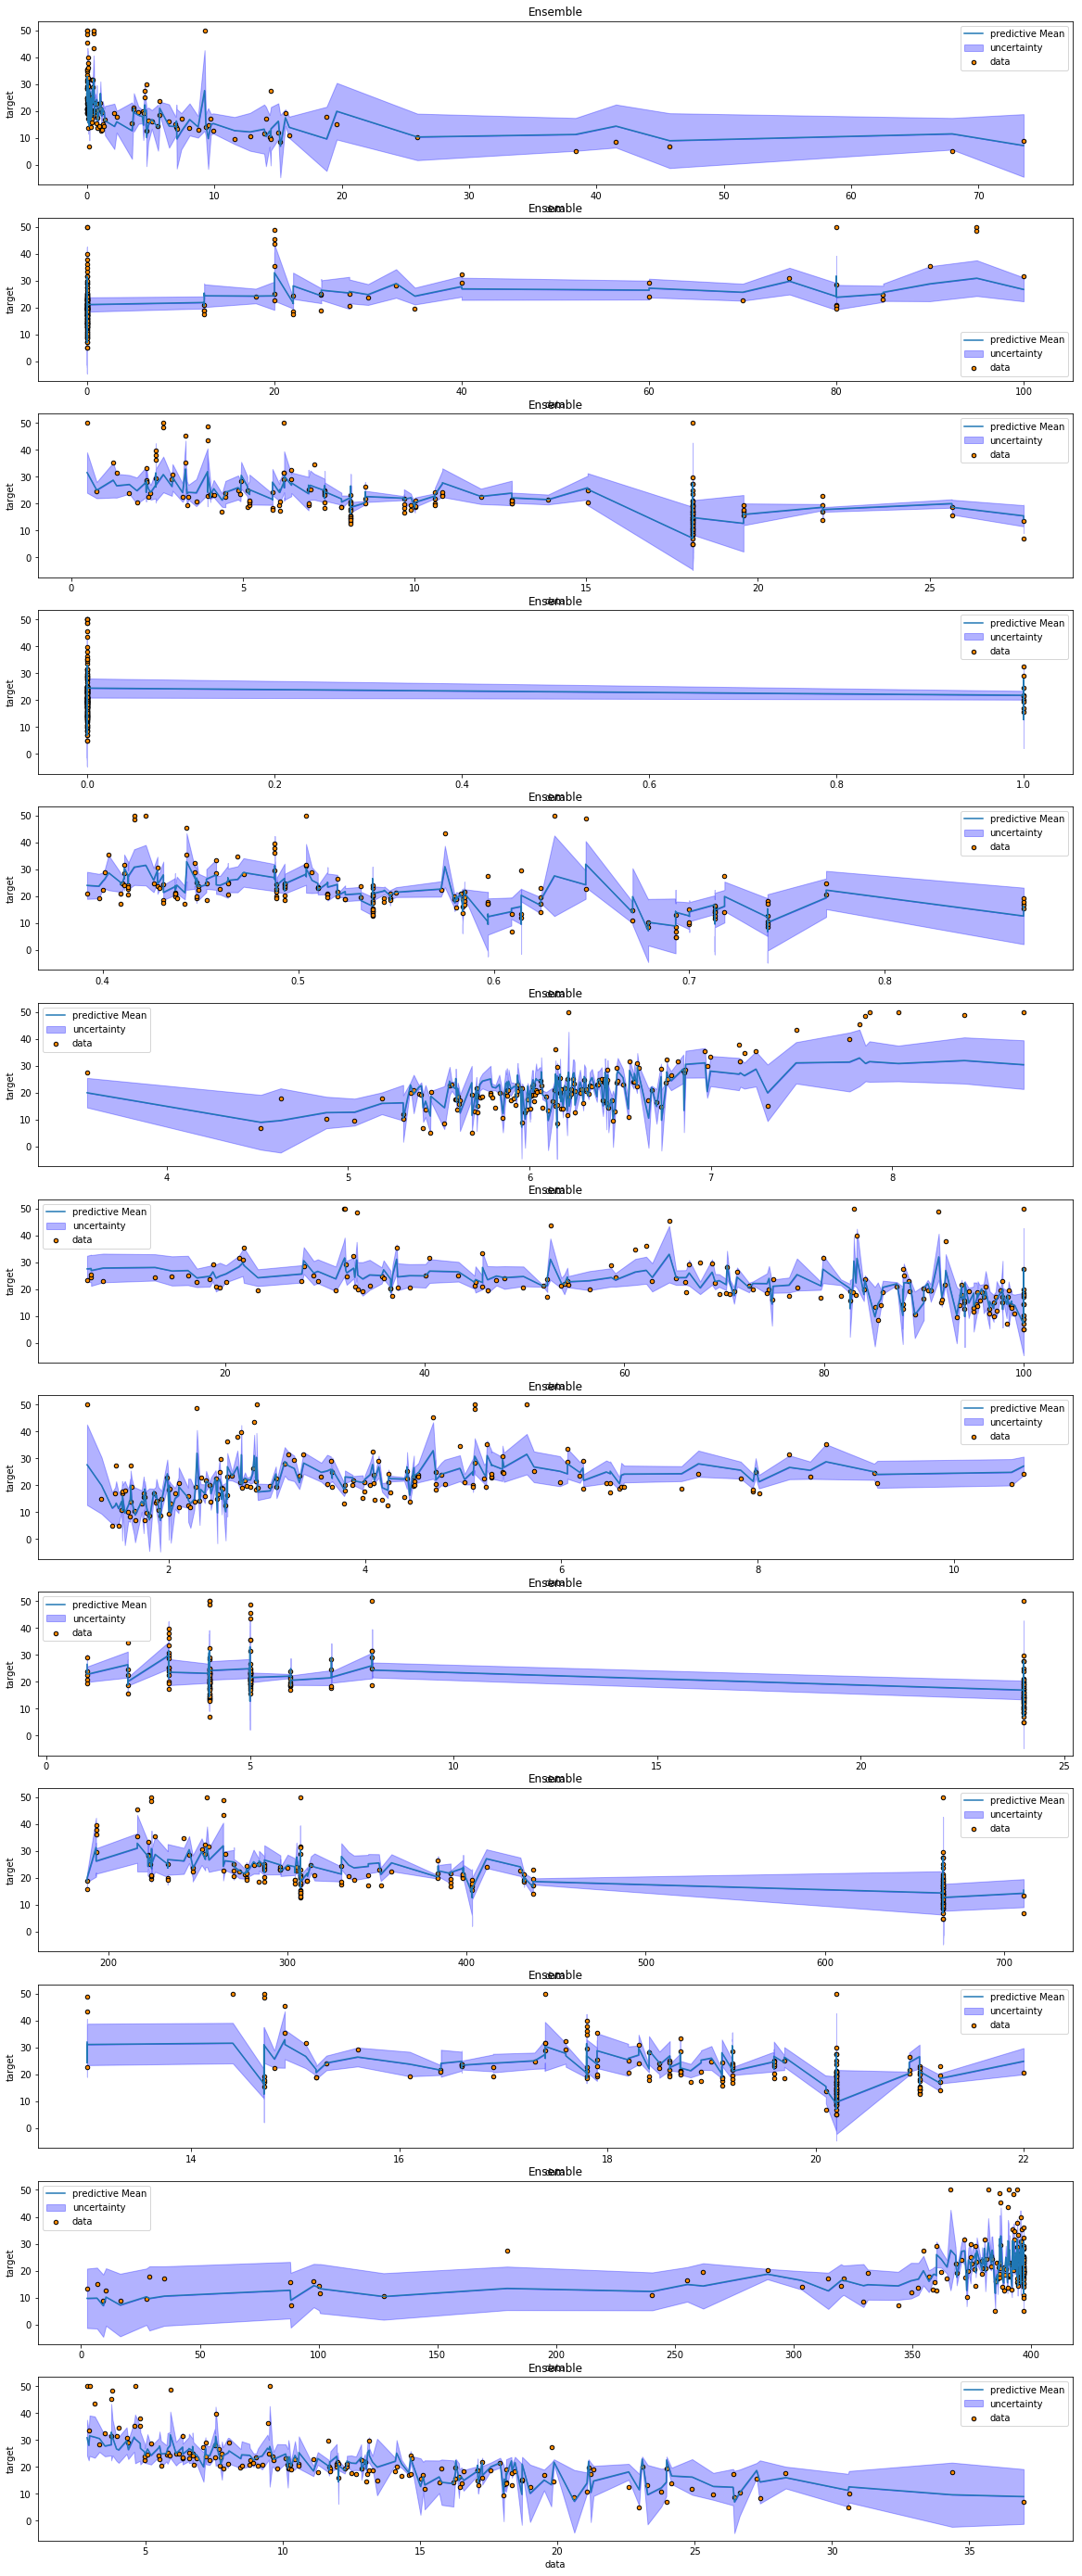

In [18]:
mixed_ensemble.fit(X_train,y_train)
y_hat,std  = mixed_ensemble.predict(X_test,std=True)
mixed_ensemble.mutli_dimenstional_scatterplot(X_test,y_test)

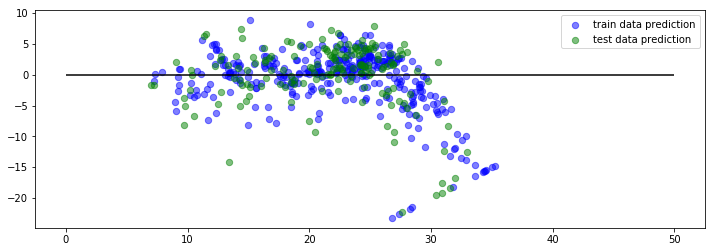

In [19]:
mixed_ensemble.plot_residuals(X_train,y_train,X_test,y_test)

In [20]:
mixed_ensemble.self_evaluate(X_test,y_test)

(167,) (167,) (167,)
coverage Probability is: 0.6946107784431138
correlation of error and uncertainty is: (0.3973873124215449, 1.0524574518682805e-07)
correlation of target value and uncertainty is: (0.7915544073181161, 3.9893028124531696e-37)
correlation of target value and error is: (0.7915544073181161, 3.9893028124531696e-37)


## Bootstrap

In [21]:
bootstrap_ensemble = ensemble.BootstrapEnsemble()


4407 339


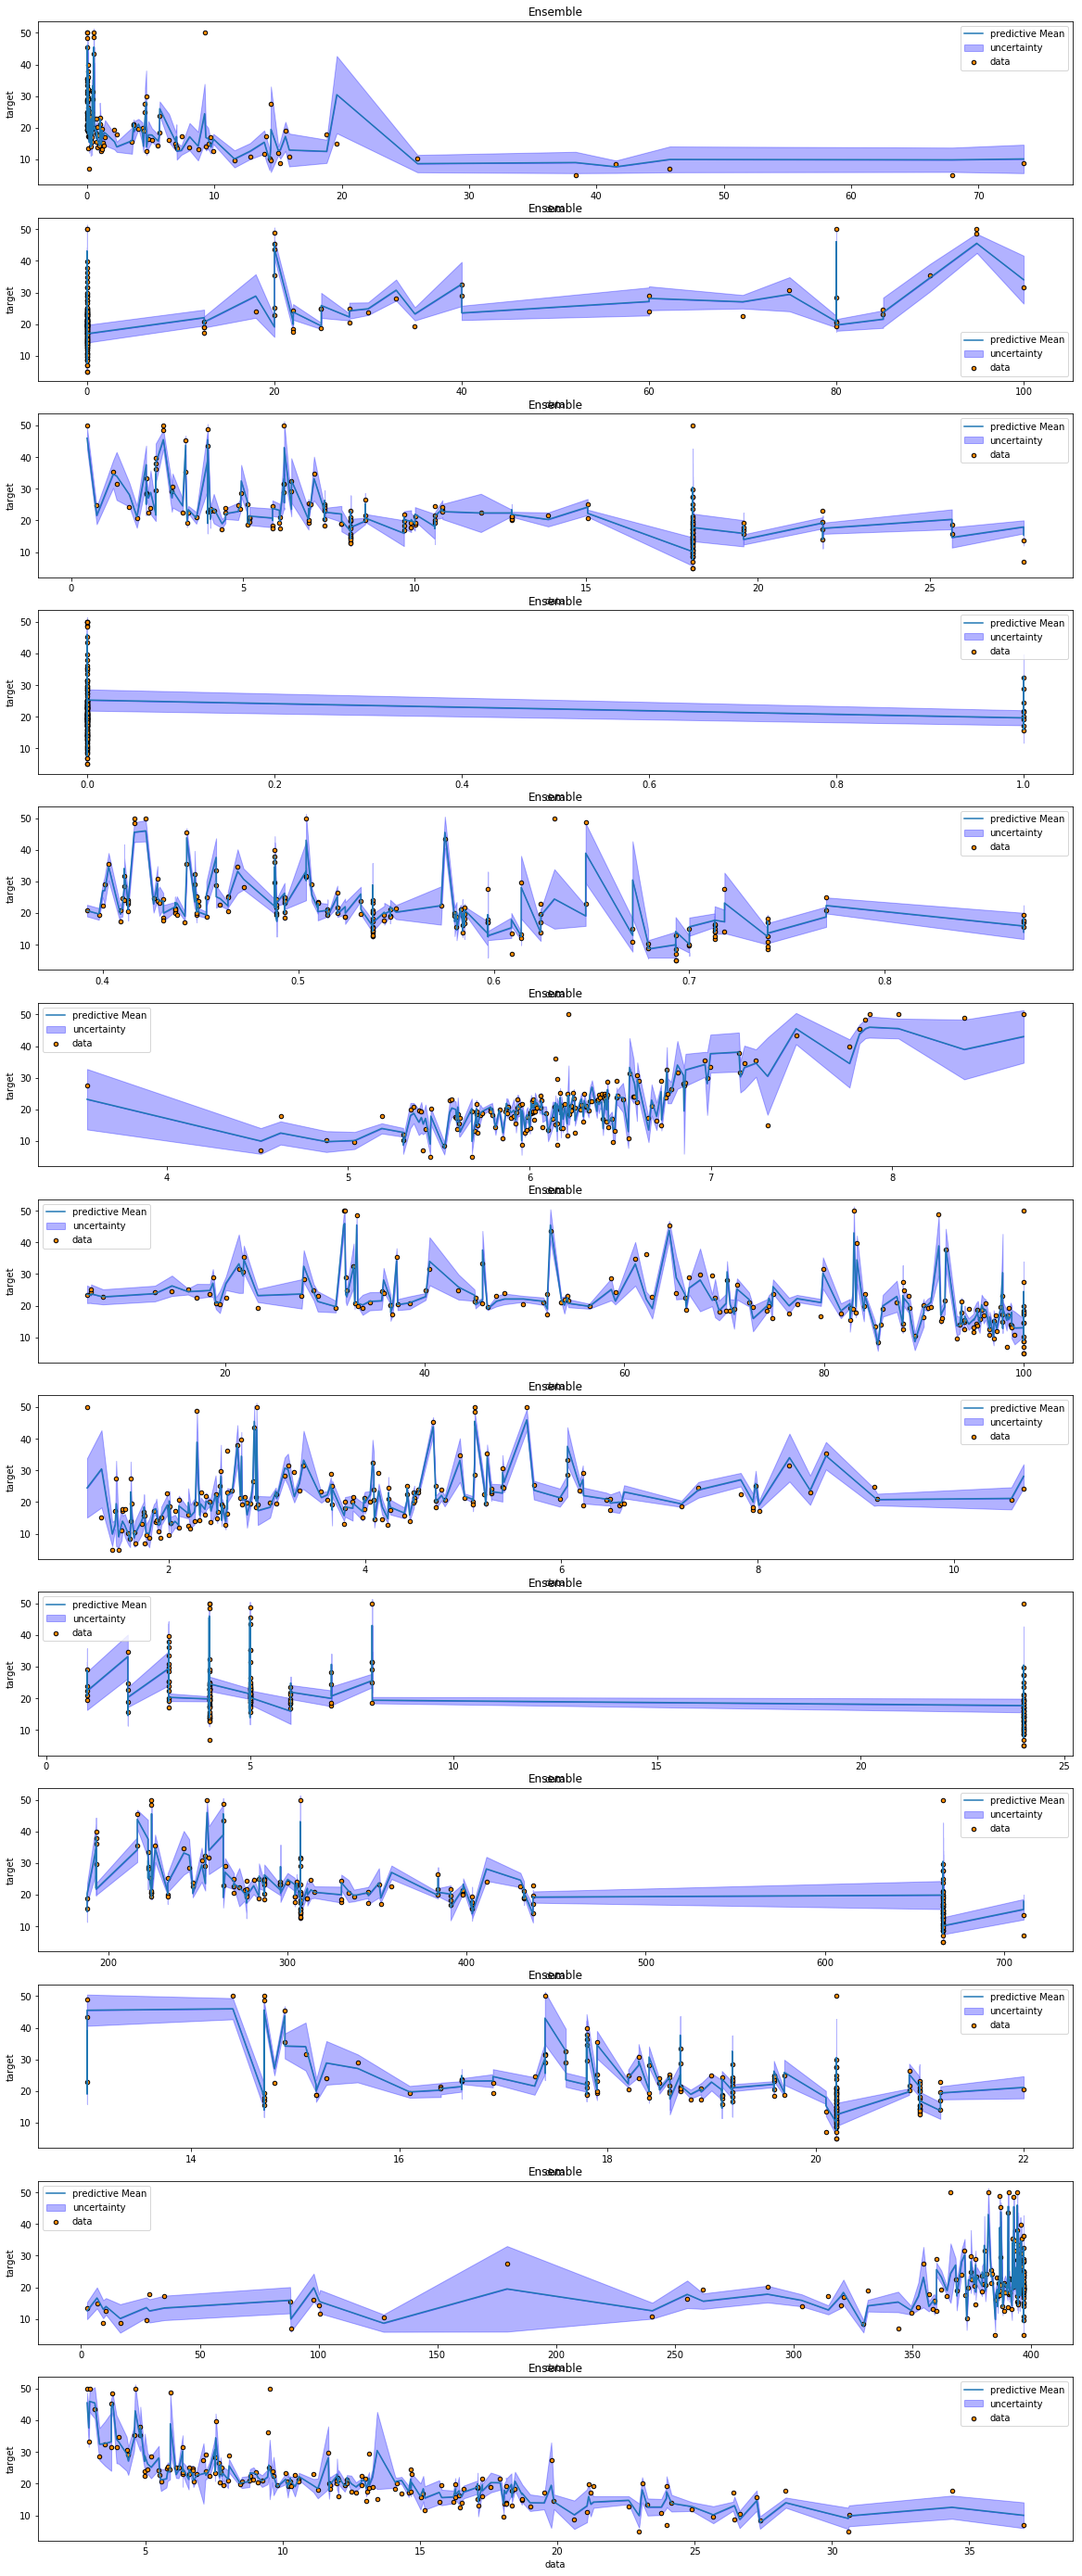

In [22]:
bootstrap_ensemble.fit(X_train,y_train)
y_hat,std  = bootstrap_ensemble.predict(X_test,std=True)
bootstrap_ensemble.mutli_dimenstional_scatterplot(X_test,y_test)

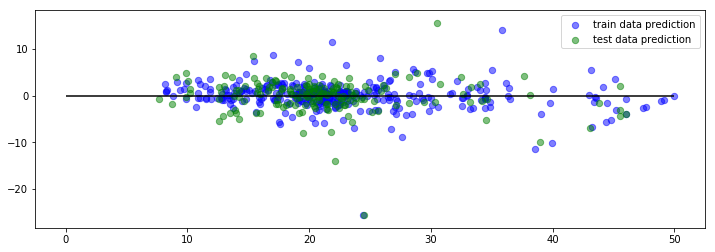

In [23]:
bootstrap_ensemble.plot_residuals(X_train,y_train,X_test,y_test)

In [24]:
bootstrap_ensemble.self_evaluate(X_test,y_test)

(167,) (167,) (167,)
coverage Probability is: 0.6826347305389222
correlation of error and uncertainty is: (0.38197470004942818, 3.513102153108176e-07)
correlation of target value and uncertainty is: (0.904812928826908, 4.5280006471082196e-63)
correlation of target value and error is: (0.904812928826908, 4.5280006471082196e-63)


## Different Data Shuffling

In [25]:
shuffle_ensemble = ensemble.ShuffleEnsemble()

4407 339


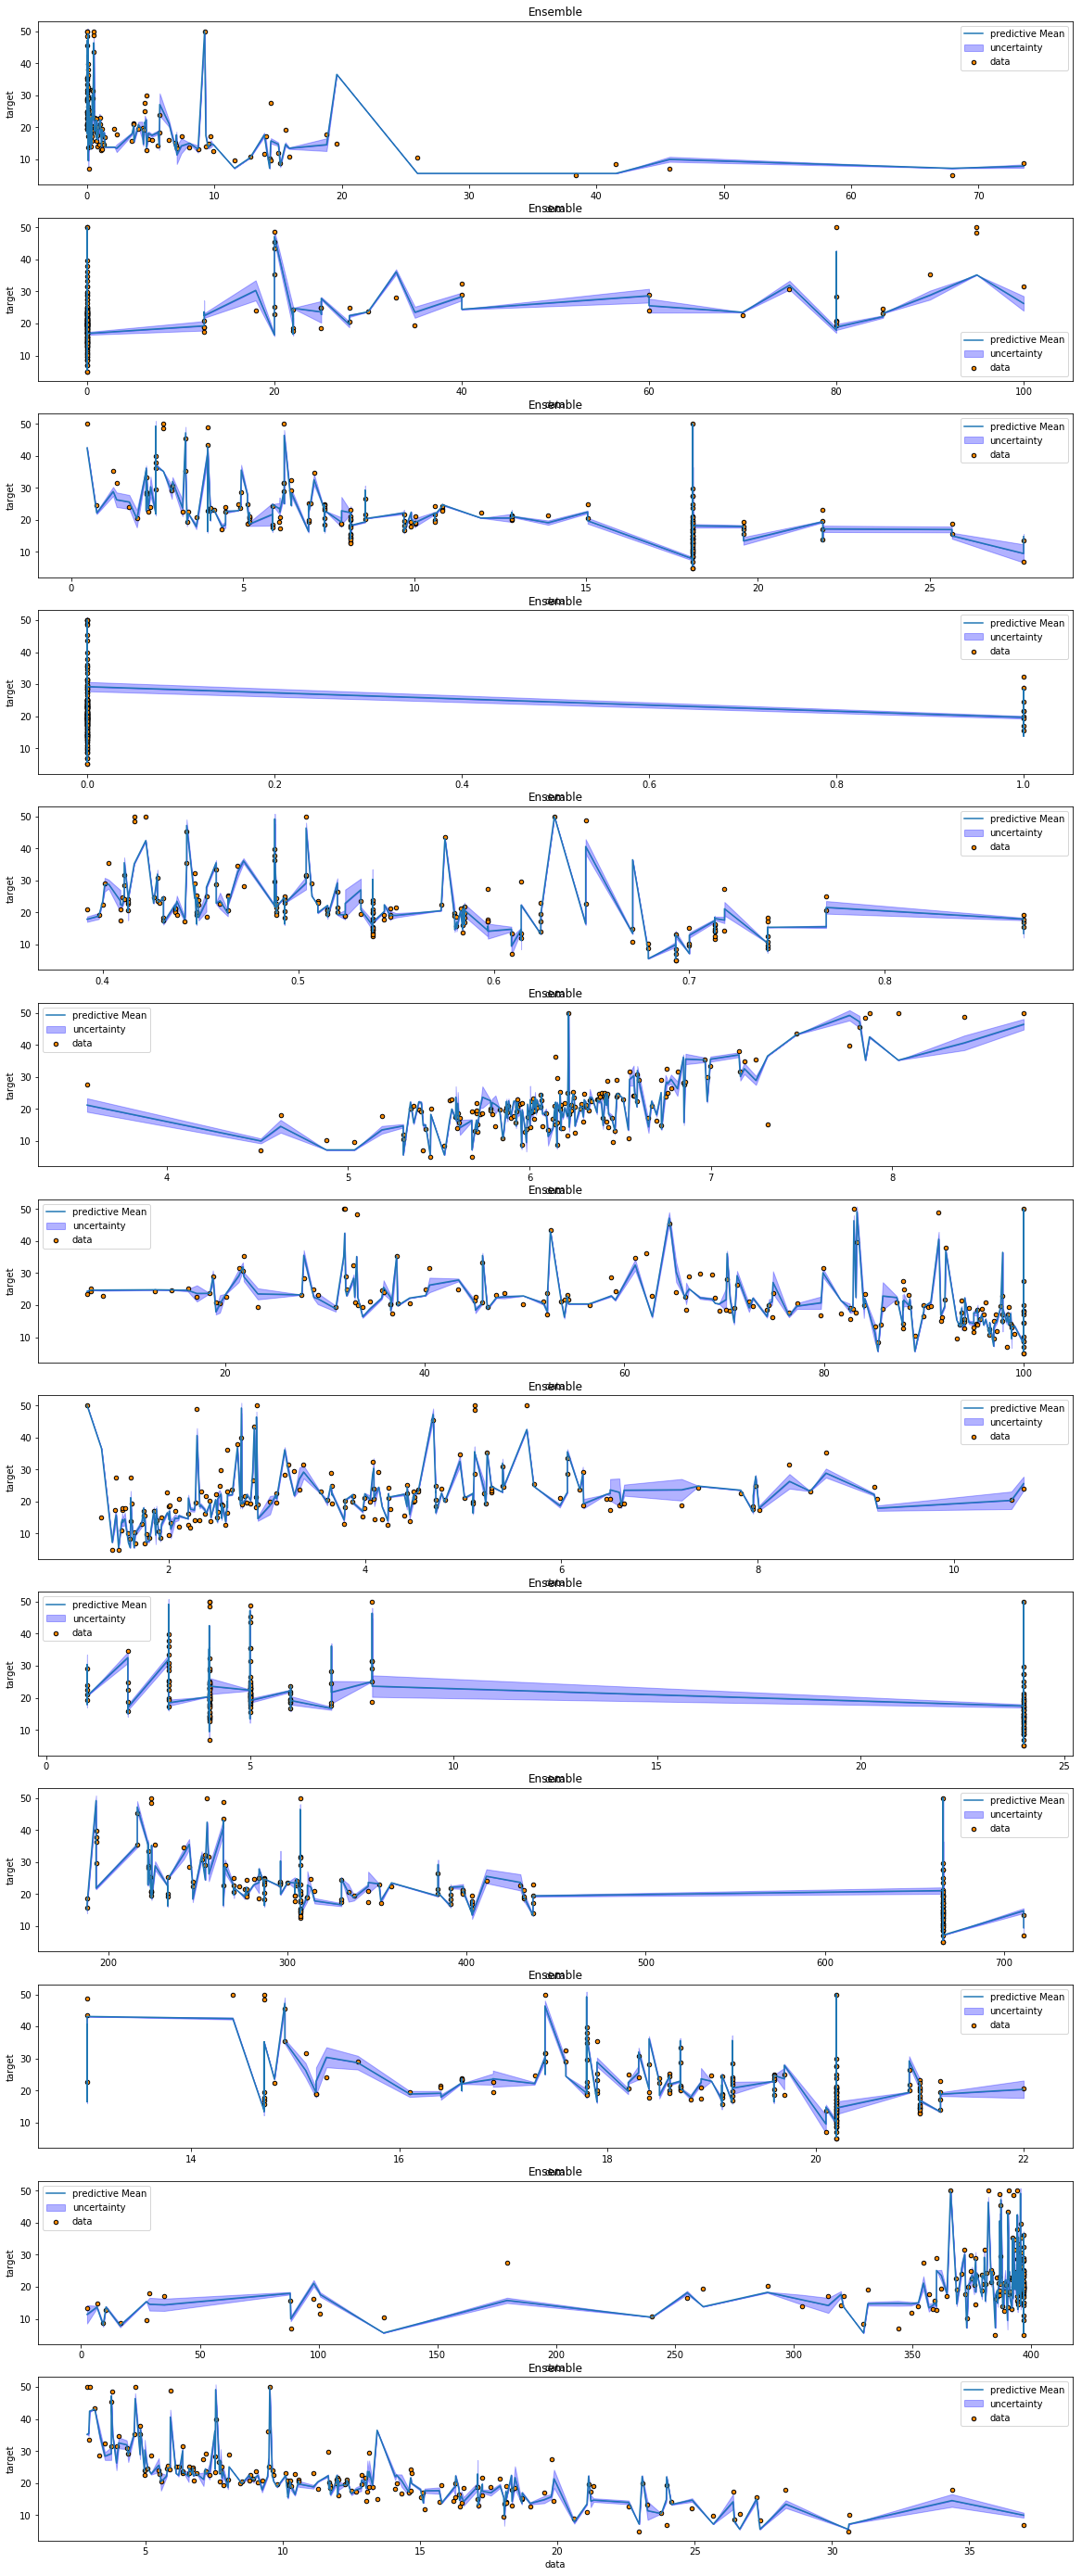

In [26]:
shuffle_ensemble.fit(X_train,y_train)
y_hat,std  = shuffle_ensemble.predict(X_test,std=True)
shuffle_ensemble.mutli_dimenstional_scatterplot(X_test,y_test)

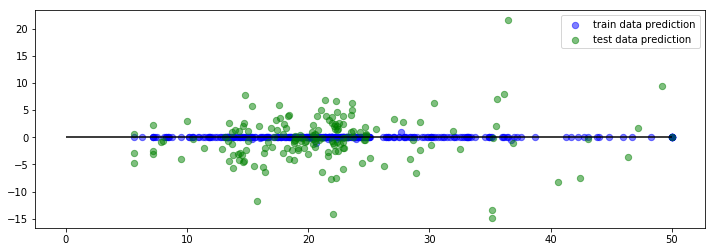

In [27]:
shuffle_ensemble.plot_residuals(X_train,y_train,X_test,y_test)

In [28]:
shuffle_ensemble.self_evaluate(X_test,y_test)

(167,) (167,) (167,)
coverage Probability is: 0.16167664670658682
correlation of error and uncertainty is: (-0.034617760702794952, 0.65694633528556268)
correlation of target value and uncertainty is: (0.87559468115606309, 5.1006925296099262e-54)
correlation of target value and error is: (0.87559468115606309, 5.1006925296099262e-54)
